In [41]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [2]:
edges = pd.read_csv('./data/panama_papers.edges.csv', low_memory=False)
address = pd.read_csv('./data/panama_papers.nodes.address.csv')
entity = pd.read_csv('./data/panama_papers.nodes.entity.csv', low_memory=False)
intermediary = pd.read_csv('./data/panama_papers.nodes.intermediary.csv')
officer = pd.read_csv('./data/panama_papers.nodes.officer.csv', low_memory=False)
other = pd.read_csv('./data/panama_papers.nodes.other.csv')

In [3]:
edges.head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
0,10000035,registered_address,14095990,Panama Papers,NaN,NaN,NaN
1,10000044,registered_address,14091035,Panama Papers,NaN,NaN,NaN
2,10000055,registered_address,14095990,Panama Papers,NaN,NaN,NaN
3,10000064,registered_address,14091429,Panama Papers,NaN,NaN,NaN
4,10000089,registered_address,14098253,Panama Papers,NaN,NaN,NaN


In [4]:
address.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Address""]",The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Address""]",The Panama Papers data is current through 2015,KAZ,Kazakhstan,14000002,Panama Papers,"""Almaly Village"" v.5, Almaty Kazakhstan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[""Address""]",The Panama Papers data is current through 2015,GBR,United Kingdom,14000003,Panama Papers,"""Cantonia"" South Road St Georges Hill Weybridg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[""Address""]",The Panama Papers data is current through 2015,GGY,Guernsey,14000004,Panama Papers,"""CAY-OS"" NEW ROAD; ST.SAMPSON; GUERNSEY; CHANN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[""Address""]",The Panama Papers data is current through 2015,KEN,Kenya,14000005,Panama Papers,"""Chirag"" Plot No 652; Mwamba Road; Kizingo; Mo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
entity.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000001,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,23-MAR-2006,25221,NaN,Defaulted,NaN,NaN
1,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000002,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,27-MAR-2006,25249,NaN,Defaulted,NaN,NaN
2,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000003,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"HOTFOCUS CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,10-JAN-2006,24138,NaN,Defaulted,NaN,NaN
3,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000004,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"SKY-BLUE GIFTS & TOYS CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,06-JAN-2006,24012,NaN,Defaulted,NaN,NaN
4,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000005,Panama Papers,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,FORTUNEMAKER INVESTMENTS CORPORATION,Samoa,Mossack Fonseca,SAM,NaN,19-APR-2006,R25638,NaN,Changed agent,NaN,NaN


In [6]:
intermediary.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Intermediary""]",The Panama Papers data is current through 2015,ZAF,South Africa,11000001,Panama Papers,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,"MICHAEL PAPAGEORGE, MR.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN
1,"[""Intermediary""]",The Panama Papers data is current through 2015,LIE,Liechtenstein,11000002,Panama Papers,NaN,CORFIDUCIA ANSTALT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN
2,"[""Intermediary""]",The Panama Papers data is current through 2015,MCO,Monaco,11000003,Panama Papers,NaN,"DAVID, RONALD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENDED,NaN,NaN
3,"[""Intermediary""]",The Panama Papers data is current through 2015,BEL,Belgium,11000004,Panama Papers,NaN,"DE BOUTSELIS, JEAN-PIERRE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENDED,NaN,NaN
4,"[""Intermediary""]",The Panama Papers data is current through 2015,LBN,Lebanon,11000005,Panama Papers,NaN,THE LEVANT LAWYERS (TLL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN


In [7]:
officer.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Officer""]",The Panama Papers data is current through 2015,KOR,South Korea,12000001,Panama Papers,NaN,KIM SOO IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Officer""]",The Panama Papers data is current through 2015,CHN,China,12000002,Panama Papers,NaN,Tian Yuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[""Officer""]",The Panama Papers data is current through 2015,AUS,Australia,12000003,Panama Papers,NaN,GREGORY JOHN SOLOMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[""Officer""]",The Panama Papers data is current through 2015,JPN,Japan,12000004,Panama Papers,NaN,MATSUDA MASUMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[""Officer""]",The Panama Papers data is current through 2015,VNM,Viet Nam,12000005,Panama Papers,NaN,HO THUY NGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
other.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note


In [9]:
officer['n.name'] = officer['n.name'].str.title()
byCountry = officer.groupby(['n.country_codes', 'n.countries'])['n.name'].nunique().to_frame().reset_index()
byCountry.columns = ['country_code', 'country_name', 'count']
byCountry

,country_code,country_name,count
0,ABW,Aruba,26
1,AGO,Angola,43
2,AIA,Anguilla,180
3,ALB,Albania,23
4,AND,Andorra,31
...,...,...,...
196,WSM,Samoa,250
197,YEM,Yemen,8
198,ZAF,South Africa,1665
199,ZMB,Zambia,39


In [10]:
world = gpd.read_file('./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
world = world[['ADM0_A3', 'geometry']]
world.columns = ['country_code', 'geometry']
world = world[world['country_code'] != 'ATA']
world

,country_code,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [11]:
merged = world.merge(byCountry, how='left').fillna(0)
merged

,country_code,geometry,country_name,count
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,3.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,41.0
2,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0,0.0
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,707.0
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,3288.0
...,...,...,...,...
171,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,28.0
172,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,17.0
173,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0,0.0
174,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,16.0


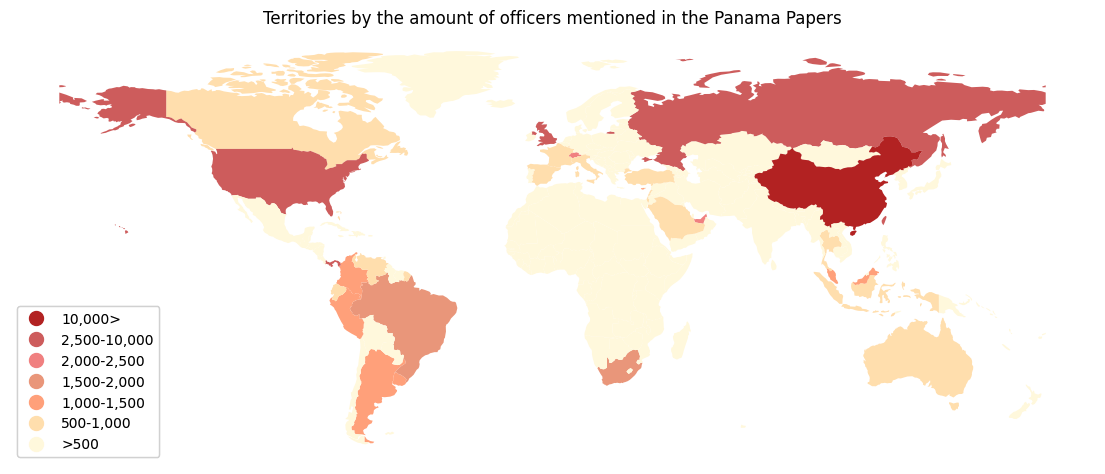

In [110]:
def add_color(row):
    if row['count'] >=10000:
        return 'firebrick'
    elif row['count'] >=2500:
        return 'indianred'
    elif row['count'] >= 2000:
        return 'lightcoral'
    elif row['count'] >= 1500:
        return 'darksalmon'
    elif row['count'] >= 1000:
        return 'lightsalmon'
    elif row['count'] >= 500:
        return 'navajowhite'
    else:
        return 'cornsilk'

merged['color'] = merged.apply(lambda row: add_color(row), axis=1)
ax = merged.plot(color=merged['color'], figsize = (14, 8))

# Create custom legend (Because there is no default way to do it)

color_dict = {
    '10,000>' : 'firebrick',
    '2,500-10,000' : 'indianred',
    '2,000-2,500' : 'lightcoral',
    '1,500-2,000' : 'darksalmon',
    '1,000-1,500' : 'lightsalmon',
    '500-1,000' : 'navajowhite',
    '>500' : 'cornsilk'
}

custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
leg_points = ax.legend(custom_points, color_dict.keys(), loc=3)
ax.add_artist(leg_points)
ax.set_yticks([])
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_title('Territories by the amount of officers mentioned in the Panama Papers');

In [100]:
perCountry = byCountry[['country_name', 'count']].sort_values(by=['count'], ascending=False).reset_index().head(20)

# We have to do this manually because I haven't found a data source that can map all countries and territories to their respective continent
continents = pd.DataFrame({
    "country_name": ["China", "Hong Kong", "British Virgin Islands", "United Kingdom", "Russia", 
                     "Taiwan", "United States", "Jersey", "Panama", "Switzerland", 
                     "United Arab Emirates", "Singapore", "Guernsey", "South Africa", 
                     "Brazil", "Uruguay", "Malaysia", "Peru", "Isle of Man", "Cyprus"],
    "continent": ["Asia", "Asia", "Central America", "Europe", "Europe", 
                  "Asia", "North America", "Europe", "Central America", "Europe", 
                  "Asia", "Asia", "Europe", "Africa", 
                  "South America", "South America", "Asia", "South America", 
                  "Europe", "Europe"]})

perCountry = perCountry.merge(continents, how='inner', on='country_name')
perCountry

,index,country_name,count,continent
0,33,China,18181,Asia
1,75,Hong Kong,10602,Asia
2,192,British Virgin Islands,8039,Central America
3,61,United Kingdom,4109,Europe
4,154,Russia,3385,Europe
5,183,Taiwan,3369,Asia
6,188,United States,3288,North America
7,90,Jersey,3286,Europe
8,142,Panama,3134,Central America
9,31,Switzerland,2428,Europe


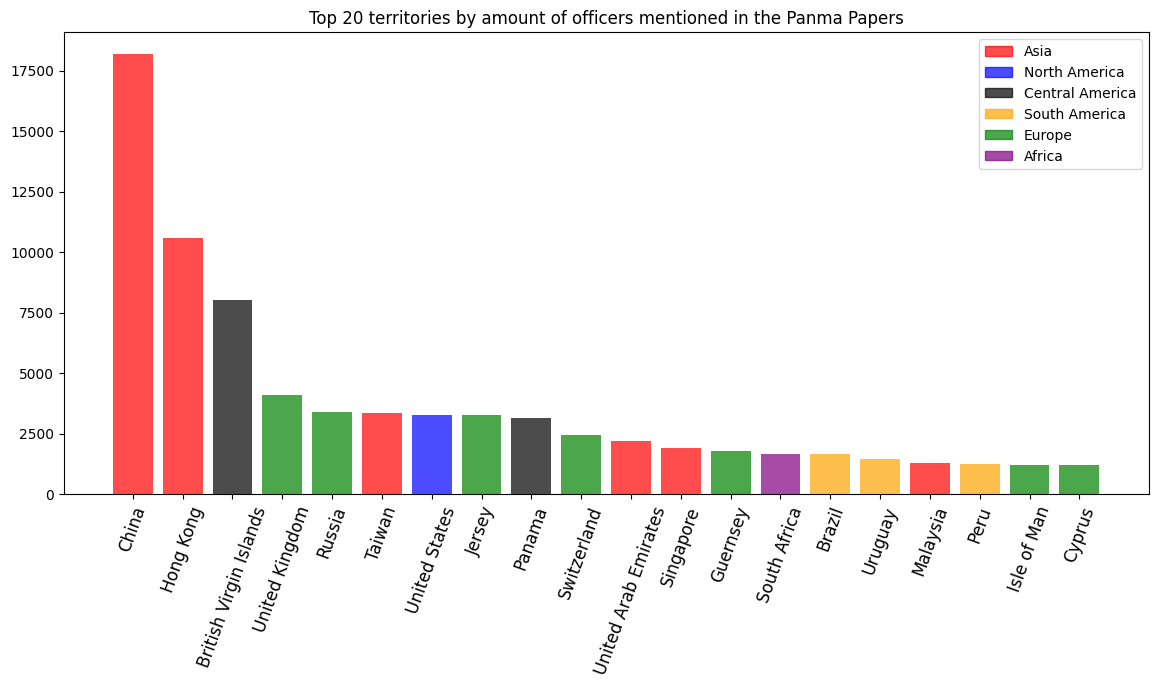

In [111]:
colors = {
    "Asia": "red",
    "North America": "blue",
    "Central America": "black",
    "South America": "orange",
    "Europe": "green",
    "Africa": "purple", 
}

c = perCountry['continent'].apply(lambda row: colors[row])

# Plot the bar chart
plt.figure(figsize=(14,6))
plt.bar(perCountry['country_name'], perCountry['count'], color=c, alpha=0.7)
ax = plt.gca()
ax.xlabel = ''
ax.tick_params(axis="x", rotation=70, labelsize=12)
ax.set_title('Top 20 territories by amount of officers mentioned in the Panma Papers')

      
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.7) for label in labels]
plt.legend(handles, labels)